In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

noshowappointments



In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/kaggle/input/noshowappointments/KaggleV2-May-2016.csv")

In [3]:
#Convert No-show: "Yes" = 1, "No" = 0
df['No-show'].replace(to_replace="Yes", value=1, inplace = True)
df['No-show'].replace(to_replace="No", value=0, inplace = True)
df[['No-show']].head(20)

,No-show
0,0
1,0
2,0
3,0
4,0
5,0
6,1
7,1
8,0
9,0


In [4]:
#Deleting rows with Age < 0
df = df[df.Age>0]

In [5]:
df_data =  df.drop(["PatientId", "AppointmentID", "ScheduledDay", "AppointmentDay" ,"Alcoholism","Diabetes","Scholarship","Hipertension" ,"Gender"], 1)
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106987 entries, 0 to 110526
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Age            106987 non-null  int64 
 1   Neighbourhood  106987 non-null  object
 2   Handcap        106987 non-null  int64 
 3   SMS_received   106987 non-null  int64 
 4   No-show        106987 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 4.9+ MB


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [6]:
# Apply LabelEncoder to "Neighborhood" coloumn

from sklearn.preprocessing import LabelEncoder
number = LabelEncoder()
df_data["Neighbourhood"] = number.fit_transform(df_data["Neighbourhood"].astype("str"))
#df_data["Gender"] = number.fit_transform(df_data["Gender"].astype("str"))

In [7]:
from sklearn import preprocessing
from sklearn import metrics 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

In [8]:
X = df_data.copy()
X = X.drop("No-show", axis = 1).values
y = df_data.loc[:,"No-show"].values

print("Proportion of response")
for i in np.unique(y) :
    print("The number of {} is {} accouting for {}%.".format(i, np.bincount(y)[i], np.round(np.bincount(y)[i]/len(y), 3)*100 ))

Proportion of response
The number of 0 is 85307 accouting for 79.7%.
The number of 1 is 21680 accouting for 20.3%.


In [9]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=25)

print("Proportion of response in train set")
for i in np.unique(y_train) :
    print("The number of {} is {} accouting for {}%.".format(i, np.bincount(y_train)[i], np.round(np.bincount(y_train)[i]/len(y_train), 3)*100 ))
print("\nProportion of response in test set")
for i in np.unique(y_test) :
    print("The number of {} is {} accouting for {}%.".format(i, np.bincount(y_test)[i], np.round(np.bincount(y_test)[i]/len(y_test), 3)*100 ))

Proportion of response in train set
The number of 0 is 63853 accouting for 79.60000000000001%.
The number of 1 is 16387 accouting for 20.4%.

Proportion of response in test set
The number of 0 is 21454 accouting for 80.2%.
The number of 1 is 5293 accouting for 19.8%.


In [10]:
#Logistic regression
from sklearn.linear_model import LogisticRegression

lreg = LogisticRegression(random_state=25)
lreg.fit(X_train, y_train)


#Predict Output
y_pred= lreg.predict(X_test)


#Classification report
LOGIS_result = classification_report(y_test, y_pred)
#print(LOGIS_result)

target_names = ['show up', 'no show']
print(classification_report(y_test, y_pred, target_names=target_names))


#Store performance metrics
LOGIS_accuracy = accuracy_score(y_test, y_pred)
LOGIS_precision = precision_score(y_test, y_pred)
LOGIS_recall = recall_score(y_test, y_pred)
LOGIS_f1 = f1_score(y_test, y_pred)

              precision    recall  f1-score   support

     show up       0.80      1.00      0.89     21454
     no show       0.00      0.00      0.00      5293

    accuracy                           0.80     26747
   macro avg       0.40      0.50      0.45     26747
weighted avg       0.64      0.80      0.71     26747



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classificat

In [11]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[21454,     0],
       [ 5293,     0]])

Text(0.5, 257.44, 'Predicted label')

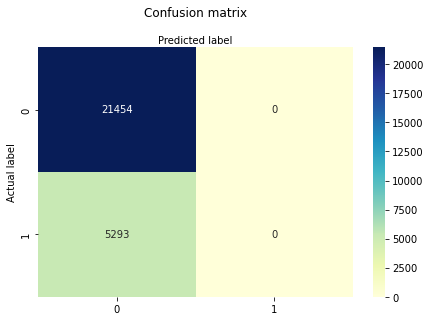

In [12]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


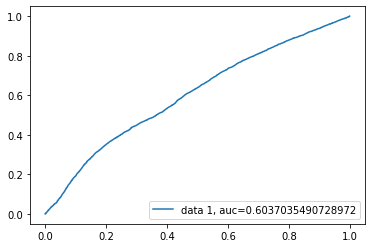

In [13]:
# ROC curve shows the tradeoff between sensitivity and specificity
y_pred_proba = lreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()